In [19]:
import numpy as np
from scipy import stats

# Example AUC data from 10-fold cross-validation for three classifiers
# Combining results from RF, XGBoost, and SVM
auc_with_cutter = np.array([
    0.7492, 0.8667, 0.8644, 0.8815, 0.8867, # RF
    0.9022,  # XGBoost
    0.7951, 0.7958   # SVM
])
auc_without_cutter = np.array([
    0.6289, 0.8133, 0.8137, 0.8746, 0.8852,  # RF
    0.8947,  # XGBoost
    0.7981, 0.7329  # SVM
])

# Check for normality in the differences
differences = auc_with_cutter - auc_without_cutter
_, p_value_normality = stats.shapiro(differences)
if p_value_normality > 0.05:
    print("Differences are normally distributed.")
    # Perform paired t-test
    _, p_value = stats.ttest_rel(auc_with_cutter, auc_without_cutter)
else:
    print("Differences are not normally distributed.")
    # Perform Wilcoxon signed-rank test
    _, p_value = stats.wilcoxon(auc_with_cutter, auc_without_cutter)

print("P-Value:", p_value)

# Interpretation of the test result
if p_value < 0.05:
    print("Reject the null hypothesis - Significant differences exist.")
else:
    print("Fail to reject the null hypothesis - No significant differences.")


Differences are normally distributed.
P-Value: 0.04149113086597493
Reject the null hypothesis - Significant differences exist.


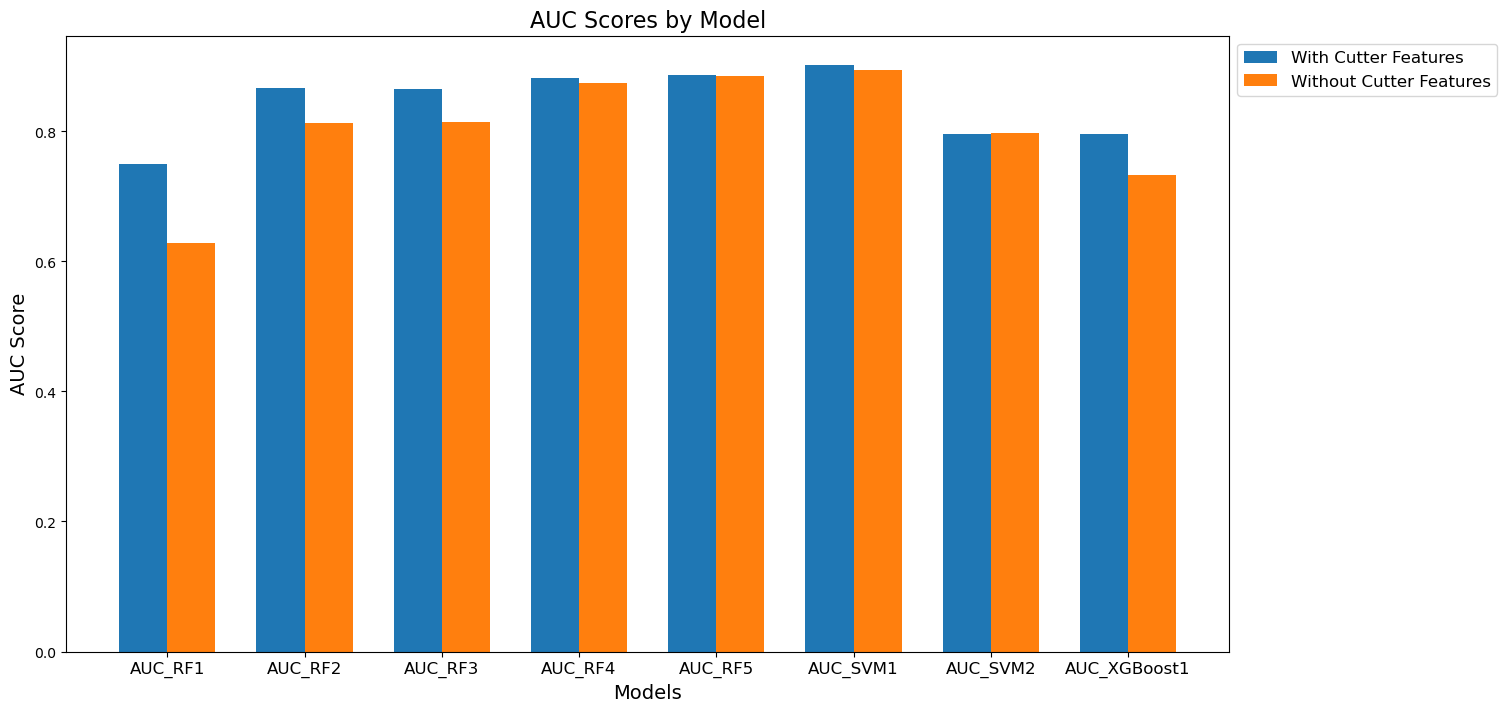

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# AUC scores
models = ['AUC_RF1', 'AUC_RF2', 'AUC_RF3', 'AUC_RF4', 'AUC_RF5', 'AUC_SVM1', 'AUC_SVM2', 'AUC_XGBoost1']
auc_with_cutter = np.array([0.7492, 0.8667, 0.8644, 0.8815, 0.8867, 0.9022, 0.7951, 0.7958])
auc_without_cutter = np.array([0.6289, 0.8133, 0.8137, 0.8746, 0.8852, 0.8947, 0.7981, 0.7329])

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Set the figure size (width, height in inches)
fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width/2, auc_with_cutter, width, label='With Cutter Features')
rects2 = ax.bar(x + width/2, auc_without_cutter, width, label='Without Cutter Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)  # Set the font size for x-axis label
ax.set_ylabel('AUC Score', fontsize=14)  # Set the font size for y-axis label
ax.set_title('AUC Scores by Model', fontsize=16)  # Set the font size for title
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)  # Set the font size for x-axis tick labels

# Place the legend outside the plot area to the right
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

